In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import random
import itertools
import scipy
from scipy.stats import pareto
import sys
from multiprocessing import Pool
import pickle
from scipy.optimize import fsolve
import pandas as pd
from scipy.special import zeta
from scipy.stats import poisson
sys.path.insert(0, "../../lib")# add the library folder to the path I look for modules
import configurational_model
import configurational_model_regulatory
import component as co
import latexify
import load_mathematica_tb
#generators.configuration_model as configuration_model
def load_obj(name ):
    with open('dic-' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

def spacchetta(filename):
    ''' This reads the macroscopic cavity theory generated from the  Mathematica file "power.nb"'''
    with open(filename) as f:
        lines=f.read().splitlines()
    c_thr = float(lines[0])
    lines[1]=lines[1].replace( 'x /. {}[[-1]]}','0')
    content  = [[float(el.strip('}').strip('{')) for el in line.split(',')]for line in lines[1].split('\t')]
    lambda_thr, g_thr = zip(*content)
    return g_thr,lambda_thr,c_thr

The pareto degree pdf is:
$$
f(x)=\frac{\alpha}{x^{\alpha+1}}
$$
for $x\geq1$. 
The discete variables have the probabilty:
$$p(k)=\int_k^{k+1}f(x)dx=\left(\dfrac{1}{k}\right)^\alpha-\left(\dfrac{1}{k+1}\right)^\alpha$$
discrete variables are obtained taking the ceil function.
For the continuous variable the average exists as long $\alpha>1$, and variance is finite if $\alpha>2$
The following cell shows that the discrete variable goes the continuous.


$$p(k)=\dfrac{\left(1+\frac{1}{k}\right)^\alpha-1}{(k+1)^\alpha}\sim \frac{\alpha}{k(k+1)^\alpha}\sim_{k\gg1}\frac{\alpha}{k^{\alpha+1}}
$$

Text(0, 0.5, '$p(k)$')

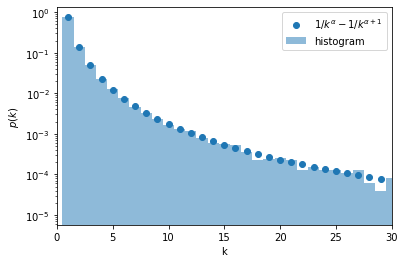

In [8]:
N1=100000
aseq= np.floor(1+np.random.pareto(gamma_G,N1)) #generate_degree_seq(gamma_G,N1)
h,b= np.histogram(aseq,bins=np.arange(1,max(aseq)+2))
plt.bar(b[:-1],h/sum(h),np.diff(b),alpha=0.5,label='histogram')
k=np.arange(1,30)
plt.plot(k,(1/(k))**(gamma_G)-(1/(k+1)**(gamma_G)),'o',label='$1/k^{\\alpha}-1/k^{\\alpha+1}$')
plt.semilogy()
plt.xlim(0,30)
plt.legend()
np.min(aseq)
plt.xlabel('k')
plt.ylabel('$p(k)$')

Theory is generated by the script ```power.wls```. Go in the folder and run from terminal 

```
wolframscript -script power.wls
```

Simulation is generated by the python script ```power-both.py```

In [45]:
dic = load_obj('powerlaw-both')
data=np.array(dic['data'])
gamma_Gs =dic['gamma_Gs']
#gamma_Gs = dic['gamma']
dic.keys()

dict_keys(['data', 'N1', 'gamma_Gs', 'descr'])

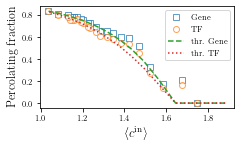

In [47]:
latexify.latexify(columns=2)
cin = data[:,2]
plt.plot(cin,np.array(data)[:,0],'s',mfc='w',label= 'Gene',alpha = 0.7)
plt.plot(cin,np.array(data)[:,1],'o',mfc='w',label='TF',alpha=0.7)
din=np.mean(data,axis=0)[-1]
'''cav_gene_curve=on.gene_cavity_tb.iloc[:,np.argmin((np.array(on.gene_cavity_tb.index)-din+1)**2)]#select the theoretical values with the closest possible value of c
cav_TF_curve=on.TF_cavity_tb.iloc[:,np.argmin((np.array(on.gene_cavity_tb.index)-din+1)**2)]
index=cav_gene_curve.index
value=cav_gene_curve.values

value=cav_TF_curve.values
'''
g_thr,lambda_thr,c_thr = spacchetta("genes_on_cavity.txt")
if abs((c_thr+1)/data[0][3]-1)>0.2:
    print('Attention!! Simulation and theory at different c')
#plt.plot(np.array(lambda_thr),g_thr,'--',label= 'thr. Gene')
plt.plot(zeta(lambda_thr),g_thr,'--',label= 'thr. Gene')
t_thr,lambda_thr,c_thr = spacchetta('TFs_on_cavity.txt')
plt.plot(zeta(lambda_thr),t_thr,':',label= 'thr. TF')
plt.legend()
#plt.semilogx()
plt.xlabel("$\\langle c^{\mathrm{in}} \\rangle$",fontsize=13)
plt.ylabel('Percolating fraction',fontsize=12)
plt.tight_layout()
#plt.savefig('power-both.pdf')
